In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
titanic_df = pd.read_csv('./input/titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


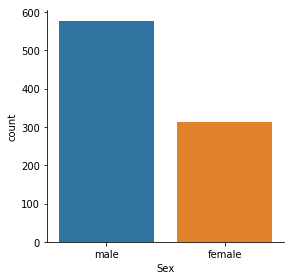

In [4]:
sns.factorplot('Sex',data=titanic_df,kind='count')

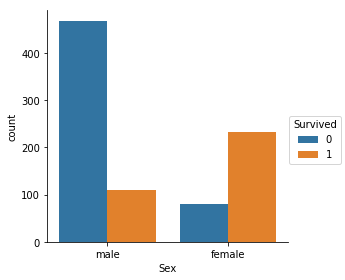

In [5]:
sns.factorplot('Sex',kind='count',data=titanic_df,hue='Survived')

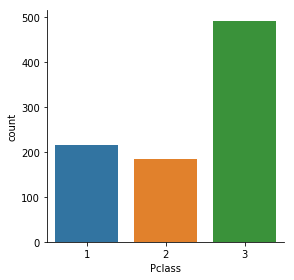

In [6]:
sns.factorplot('Pclass',data=titanic_df,kind='count')

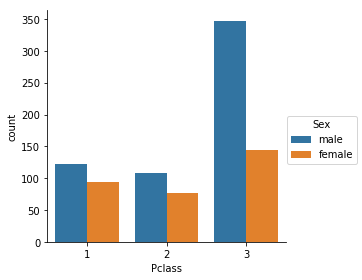

In [7]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [8]:
def titanic_children(passenger):
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(titanic_children,axis=1)

In [9]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


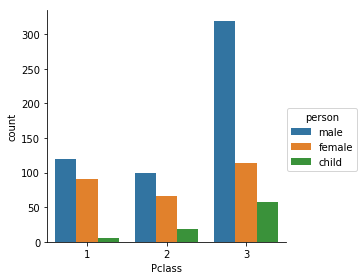

In [10]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

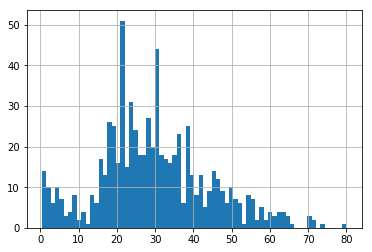

In [11]:
titanic_df['Age'].hist(bins=70)

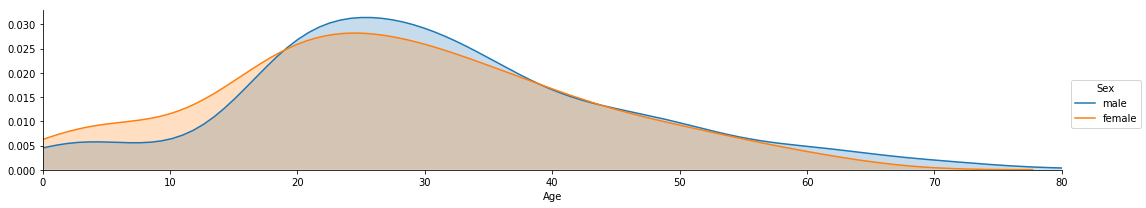

In [12]:
as_fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

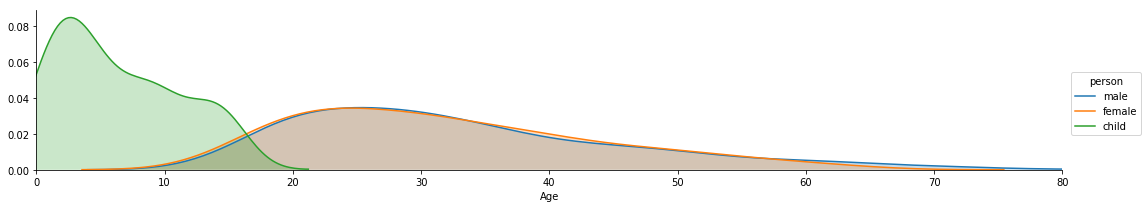

In [13]:
as_fig = sns.FacetGrid(titanic_df,hue='person',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

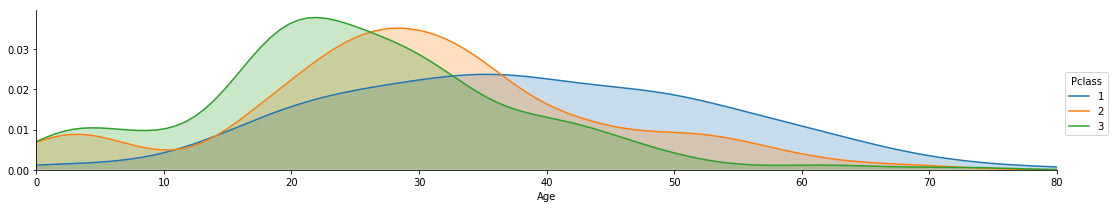

In [14]:
as_fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

In [15]:
titanic_df['Age'].mean()

29.69911764705882

In [16]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [17]:
titanic_df.drop('Cabin',axis=1, inplace=True)

In [18]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [19]:
titanic_df.isnull().values.any()

False

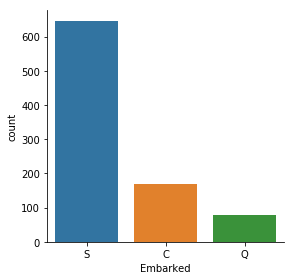

In [20]:
sns.factorplot('Embarked',data=titanic_df,kind='count')

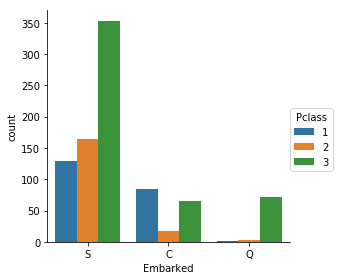

In [21]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count')

In [22]:
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp

In [23]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Without Family'

/home/he-lab/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


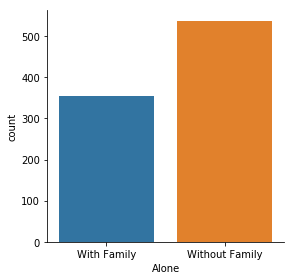

In [24]:
sns.factorplot('Alone',kind='count',data=titanic_df)

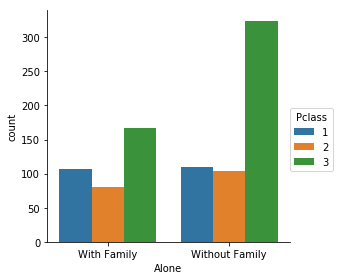

In [25]:
sns.factorplot('Alone',kind='count',data=titanic_df,hue='Pclass')

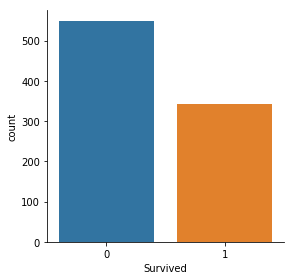

In [26]:
sns.factorplot('Survived',data=titanic_df,kind='count')

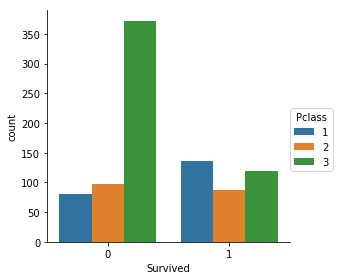

In [27]:
sns.factorplot('Survived',data=titanic_df,kind='count',hue='Pclass')

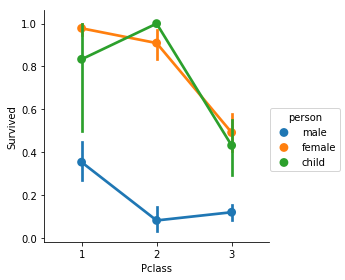

In [28]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

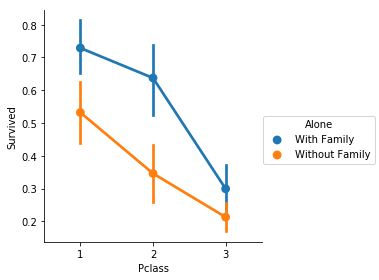

In [29]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='Alone')

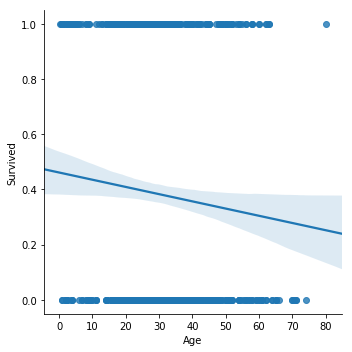

In [30]:
sns.lmplot('Age','Survived',data=titanic_df)

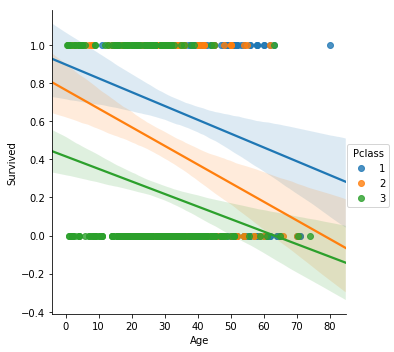

In [31]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass')

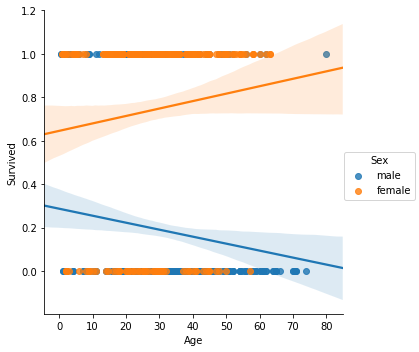

In [32]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex')

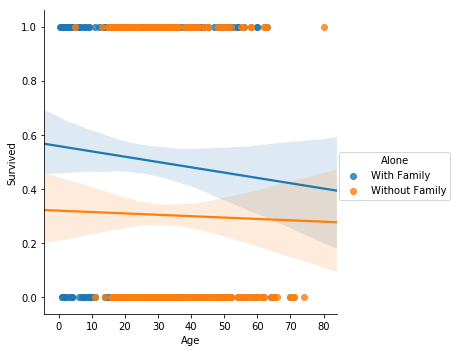

In [33]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Alone')

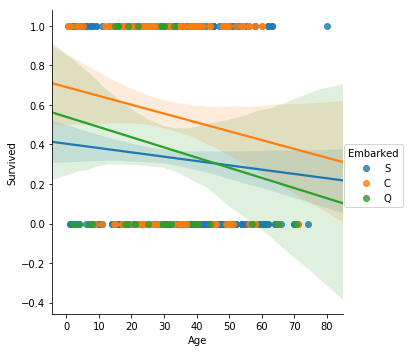

In [34]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Embarked')

In [35]:
import math
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Without Family




Shockingly, the number of passengers boarded at Southhampton are more compared to Cherbourg and Queenstown but the survival rate is high for Cherbour passengers than Southhampton. So there is a chance that Embarked helps in prediction. Let us create dummies of the Embarked and drop the Queenstown to avoid multicollinearity(might be caused due to dummies) and there are quiet a few passengers boarded at Queenstown(more are from 3rd class which has less survival rate)

Now from the analysis we understood the important features for making predictions. Features to be used for Predicting: Age, female,child,with family, C, S, class_1, class_2,Fare Now let's drop the other features like PassengerId, Name, Sibsp, Parch, Ticket as these are not much useful in the predictions. Also drop other features like without family, male, class_3,Q as they having a very low survival rate.


In [37]:
person_dummies = pd.get_dummies(titanic_df['person'])
alone_dummies = pd.get_dummies(titanic_df['Alone'])
embarked_dummies = pd.get_dummies(titanic_df['Embarked'])

embarked_dummies.drop('Q',axis=1,inplace=True)

In [38]:
pclass_dummies = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies.columns=['class_1','class_2','class_3']

In [39]:
titanic_df['Age'] = titanic_df['Age'].apply(math.ceil)
titanic_df['Fare'] = titanic_df['Fare'].apply(math.ceil)

In [40]:
titanic_df = pd.concat([titanic_df,pclass_dummies,person_dummies,alone_dummies,embarked_dummies],axis=1)

In [41]:
titanic_df.drop(['PassengerId','Name','Sex','SibSp','Parch','Ticket','Embarked'],axis=1,inplace=True)
titanic_df.drop(['Alone','person','Pclass','Without Family','male','class_3'],axis=1,inplace=True)

In [42]:
titanic_df.head()

,Survived,Age,Fare,class_1,class_2,child,female,With Family,C,S
0,0,22,8,0,0,0,0,1,0,1
1,1,38,72,1,0,0,1,1,1,0
2,1,26,8,0,0,0,1,0,0,1
3,1,35,54,1,0,0,1,1,0,1
4,0,35,9,0,0,0,0,0,0,1


In [43]:
titanic_df.to_csv('titanic.preprocessing.csv', index=False)

In [44]:
titanic_train = titanic_df.drop('Survived',axis=1)
titanic_survived = titanic_df.Survived

In [45]:
x_train, x_test, y_train, y_test = train_test_split(titanic_train,titanic_survived,test_size=0.2)

In [53]:
y_test = pd.DataFrame(y_test)
y_test.shape

(179, 1)

## Machine Learning

In [45]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
train_survival = log_model.predict(x_test)

/home/he-lab/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
print("Accuracy Score of logistic model is", accuracy_score(y_true=y_test,y_pred=train_survival))

Accuracy Score of logistic model is 0.860335195531


In [47]:
corr_coeff = list(zip(x_train.columns,np.transpose(log_model.coef_)))
print('Correlation coefficients are ',corr_coeff)

Correlation coefficients are  [('Age', array([-0.02574762])), ('Fare', array([ 0.00059665])), ('class_1', array([ 1.97974179])), ('class_2', array([ 1.05725112])), ('child', array([ 1.57723036])), ('female', array([ 2.49238029])), ('With Family', array([-0.06700429])), ('C', array([-0.07469584])), ('S', array([-0.57920588]))]


In [49]:
from sklearn.ensemble import RandomForestClassifier
rand_model = RandomForestClassifier()
rand_model.fit(x_train,y_train)

rand_predict = rand_model.predict(x_test)
#rand_model.score(y_test,rand_predict)

/home/he-lab/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
print("Accuracy Score of Random Forest model is", accuracy_score(y_true=y_test,y_pred=rand_predict))

Accuracy Score of Random Forest model is 0.832402234637


In [52]:
## Null error rate
y_train.mean()
## The accuarcy is greater than the 1-y_train.mean() = x < accuracy which means the model is not just guessing the output.

0.3848314606741573

## Deep Learning

In [46]:
# Build Neural Network
from collections import namedtuple

def build_neural_network(hidden_units=10):
    tf.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, x_train.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)
    is_training=tf.Variable(True,dtype=tf.bool)
    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(inputs, hidden_units, activation=None,kernel_initializer=initializer)
    fc=tf.layers.batch_normalization(fc, training=is_training)
    fc=tf.nn.relu(fc)
    
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Export the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network()

In [54]:
def get_batch(data_x,data_y,batch_size=32):
    batch_n=len(data_x)//batch_size
    for i in range(batch_n):
        batch_x=data_x[i*batch_size:(i+1)*batch_size]
        batch_y=data_y[i*batch_size:(i+1)*batch_size]
        
        yield batch_x,batch_y

epochs = 200
train_collect = 50
train_print=train_collect*2

learning_rate_value = 0.001
batch_size=16

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(x_train,y_train,batch_size):
            iteration+=1
            feed = {model.inputs: x_train,
                    model.labels: y_train,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }

            train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {model.inputs: x_test,
                        model.labels: y_test,
                        model.is_training:False
                       }
                val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
                

    saver.save(sess, "./titanic.ckpt")

Epoch: 3/200 Train Loss: 0.6199 Train Acc: 0.6770
Epoch: 3/200 Validation Loss: 0.6276 Validation Acc: 0.6425
Epoch: 5/200 Train Loss: 0.6013 Train Acc: 0.6784
Epoch: 5/200 Validation Loss: 0.6085 Validation Acc: 0.6480
Epoch: 7/200 Train Loss: 0.5720 Train Acc: 0.6910
Epoch: 7/200 Validation Loss: 0.6106 Validation Acc: 0.6983
Epoch: 10/200 Train Loss: 0.4931 Train Acc: 0.7725
Epoch: 10/200 Validation Loss: 0.6763 Validation Acc: 0.5698
Epoch: 12/200 Train Loss: 0.4424 Train Acc: 0.7893
Epoch: 12/200 Validation Loss: 0.5879 Validation Acc: 0.6983
Epoch: 14/200 Train Loss: 0.4232 Train Acc: 0.8020
Epoch: 14/200 Validation Loss: 0.5313 Validation Acc: 0.7430
Epoch: 16/200 Train Loss: 0.4134 Train Acc: 0.8132
Epoch: 16/200 Validation Loss: 0.4874 Validation Acc: 0.7598
Epoch: 19/200 Train Loss: 0.4079 Train Acc: 0.8244
Epoch: 19/200 Validation Loss: 0.4304 Validation Acc: 0.7765
Epoch: 21/200 Train Loss: 0.4037 Train Acc: 0.8301
Epoch: 21/200 Validation Loss: 0.4056 Validation Acc: 0.832

Epoch: 169/200 Train Loss: 0.3375 Train Acc: 0.8666
Epoch: 169/200 Validation Loss: 0.4542 Validation Acc: 0.8101
Epoch: 171/200 Train Loss: 0.3374 Train Acc: 0.8694
Epoch: 171/200 Validation Loss: 0.4586 Validation Acc: 0.8101
Epoch: 173/200 Train Loss: 0.3372 Train Acc: 0.8666
Epoch: 173/200 Validation Loss: 0.4598 Validation Acc: 0.8156
Epoch: 175/200 Train Loss: 0.3371 Train Acc: 0.8680
Epoch: 175/200 Validation Loss: 0.4650 Validation Acc: 0.8156
Epoch: 178/200 Train Loss: 0.3368 Train Acc: 0.8694
Epoch: 178/200 Validation Loss: 0.4634 Validation Acc: 0.8101
Epoch: 180/200 Train Loss: 0.3369 Train Acc: 0.8666
Epoch: 180/200 Validation Loss: 0.4651 Validation Acc: 0.8101
Epoch: 182/200 Train Loss: 0.3366 Train Acc: 0.8694
Epoch: 182/200 Validation Loss: 0.4663 Validation Acc: 0.8101
Epoch: 185/200 Train Loss: 0.3365 Train Acc: 0.8680
Epoch: 185/200 Validation Loss: 0.4688 Validation Acc: 0.8045
Epoch: 187/200 Train Loss: 0.3366 Train Acc: 0.8666
Epoch: 187/200 Validation Loss: 0.46

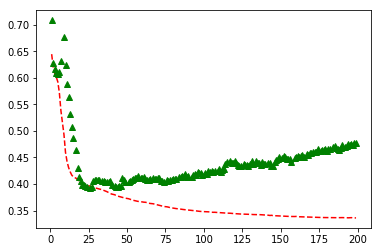

In [55]:
plt.plot(x_collect, train_loss_collect, "r--")
plt.plot(x_collect, valid_loss_collect, "g^")
plt.show()

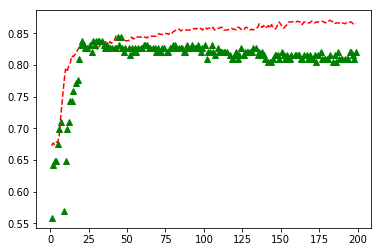

In [56]:
plt.plot(x_collect, train_acc_collect, "r--")
plt.plot(x_collect, valid_acc_collect, "g^")
plt.show()